# ML In Continuous Space


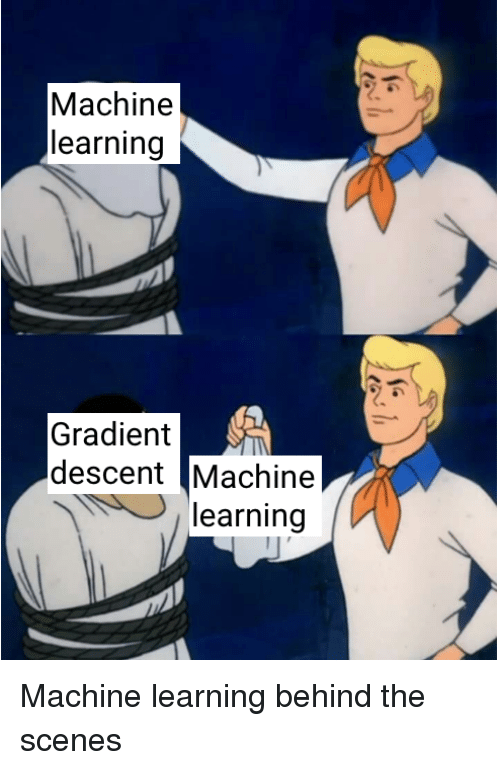

# Table of Contents
1. [Introduction](#introduction)
2. [Veriaties of GD](#gd_varieties)
3. [Chellenges](#challenges)
4. [Improvements on GD](#gd_improvements)
  * [Momentum](#momentum)
  * [Conjugate Gradient](#conjugate)
  * [Tuning the Learning Rage](#tuning)
5. [Visualization](#visualization)
  * [Vanilla Gradient Descent](#vanilla_vis)
  * [Conjugate Gradient Descent](#conjugate_vis)
6. [Code for Visualizing Gradient Descent](#code_vis)
7. [References](#references)

## Introduction <a name="introduction"></a>

In Machine Learning there are some cases in which we need to minimize a loss function so that to understand, how good our model works. Gradient descent (GD) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. If our function is convex, it yields the global minimum. In this notebook we take a brief look at GD's variants.

## Varieties of GD <a name="gd_varieties"></a>

In this method we have a weight vector ($W$) that in each step is evaluated according to our loss function ($J$). Assume we have a set of input vectors ($X$), then the $W$ is caluculated as below.
 $$ W = \underset{w \in W}{argmin}J(X,W) \qquad (1)$$

1.  Batch Gradient Descent / Vanilla Gradient Descent \\
  $$ w_j := w_j - \alpha \frac{\partial J}{\partial w_j} \qquad (2) $$ 

  As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly. $\alpha$ is learning rate and decides "how much" should the $W$ change according to derivitate of loss function. It can be a constant or be changed over time.


2. Stochastic Gradient Descent \\
Assuming that $m$ is equal to number of data points: \\
$$ w_j := w_j - \alpha \frac{\partial J_i}{\partial w_j} \quad (0 \le i \le m)  \qquad (3) $$

  As you can see, for a single update over weight vectors we must calculate cost for each data point in our training set. It becomes a time consuming calculation for large training sets.
In this case Stochastic gradient descent was introduced.
Instead of calculating the cost of all data points, we calculate the cost of one single data point and the corresponding gradient. Then we update the weights.

Note that you should shuffle the training data set to avoid pre-existing order of examples. Generally, we want to avoid providing the training examples in a meaningful order to our model as this may bias the optimization algorithm. Consequently, it is often a good idea to shuffle the training data after every epoch.

On the other hand, for some cases where we aim to solve progressively harder problems, supplying the training examples in a meaningful order may actually lead to improved performance and better convergence. The method for establishing this meaningful order is called [Curriculum Learning](https://dl.acm.org/doi/10.1145/1553374.1553380).




* pros & cons

  SGD is much faster but the convergence path of SGD is noisier than that of original gradient descent and it may never converge and move back and forth around the local minimum. This is because in each step it is not calculating the actual gradient but an approximation.Also SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily. But still, it is a much better choice And because of a weigth update on each data point, it can be used to learn online.

While batch gradient descent converges to the minimum of the basin the parameters are placed in, SGD's fluctuation, on the one hand, enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. However, it has been shown that when we slowly decrease the learning rate, SGD shows the same convergence behaviour as batch gradient descent, almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively.

One important thing is that when we are deciding between sgd and normal GD we are considering time and accuracy trade-off. </br>



3. Mini-batch Gradient Descent

   
   $$ w_j := w_j - \alpha \frac{\partial J_b}{\partial w_j}\quad ( b \in batches) \qquad (4) $$

  Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples.
This is a process that uses the flexibility of SGD and the accuracy of GD.

Minibatching reduces the variance of the stochastic gradient estimate of the true gradient, and hence tends to be a better descent direction. Of course, there are tradeoffs in total computation time versus the size of the minibatch, and these typically need to be handled on a case by case basis.

For $n$ = 1 then it becomes SGD and if $n$ = $m$ then it becomes normal GD.


## Challenges <a name="challenges"></a>

1. Gradient descent is a first-order optimization algorithm, which means it doesn’t take into account the second derivatives of the cost function. However, the curvature of the function affects the size of each learning step. The gradient measures the steepness of the curve but the second derivative measures the curvature of the curve. Therefore, if:

    - Second derivative = 0 →the curvature is linear. Therefore, the step size = the learning rate α.
    - Second derivative > 0 → the curvature is going upward. Therefore, the step size < the learning rate α and may lead to divergence.
    - Second derivative < 0 → the curvature is going downward. Therefore, the step size > the learning rate α.


2. In small dimensions, local minimum is common; however, in large dimensions, saddle points are more common. Saddle point is when the function curves up in some directions and curves down in other directions. In other words, saddle point looks like a minimum from one direction and a maximum from other direction . This happens when at least one eigenvalue of the hessian matrix is negative and the rest of eigenvalues are positive.


3. As discussed previously, choosing a proper learning rate is hard. Also, for mini-batch gradient descent, we have to adjust the learning rate during the training process to make sure it converges to the local minimum and not wander around it. Figuring out the decay rate of the learning rate is also hard and changes with different data sets.

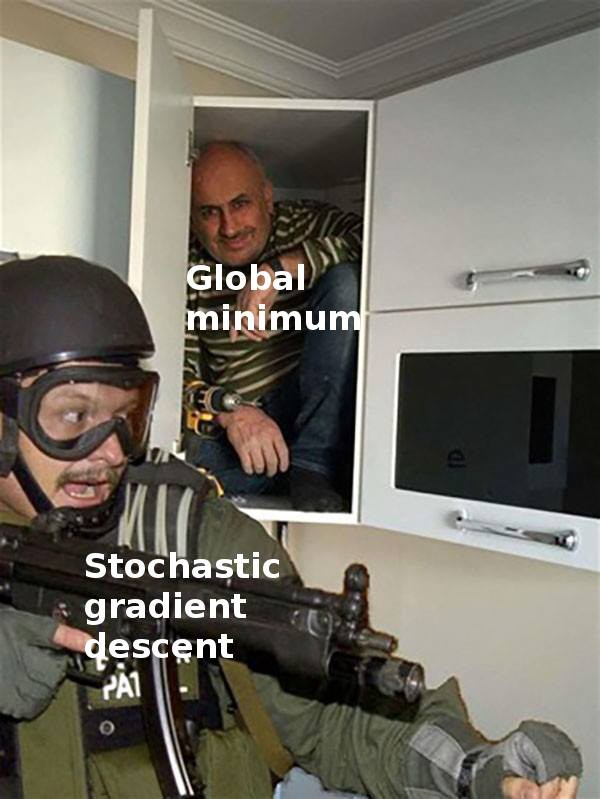

## Improvements on GD <a name="gd_improvements"></a>

### Momentum <a name="momentum"></a>

 $$ v_t = \gamma v_{t-1} + \eta \nabla_{W}J(W) $$ 

 $$ W = W - v_t \qquad  (5) $$

[Momentum](https://distill.pub/2017/momentum/) mixes the current gradient direction with the previously taken step. The idea here is that if the previous weight update was good, we may want to continue moving along this direction.

SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. In these scenarios, SGD oscillates across the slopes of the ravine while only making hesitant progress along the bottom towards the local optimum.

 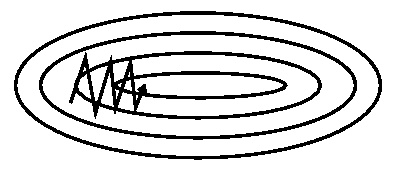






Momentum helps to accelerate SGD in the relevant direction and dampens oscillations as can be seen in Image below. It does this by adding a fraction 
γ
 of the vector of the previous update to the current update vector.

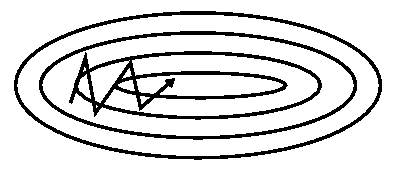



more similar approaches on this [link](https://ruder.io/optimizing-gradient-descent/index.html#momentum)

### Conjugate Gradient <a name="conjugate"></a>

The Conjugate Gradient method tries to estimate the curvature of the function being minimized by including the previous search direction with the current gradient to come up with a new better search direction.


While the theory behind this might be a little involved, the math is pretty simple. The initial search direction $S_0$ is the same as in gradient descent. Subsequent search directions $S_n$ are computed as below :

 $$ \beta = \frac{\nabla X_n^T (\nabla X_n - \nabla X_{n-1})}{\nabla X_{n-1}^T \nabla X_{n-1}} $$

 $$ S_n = \nabla X_n + \beta S_{n-1} \qquad (6) $$

The current location $X_n$ is updated with this search direction, using a step size α computed by [line search](https://en.wikipedia.org/wiki/Line_search):

$$ X_{n+1} = X_n + \alpha S_n $$

Can read Conjugate Gradient Descent in greater details in this [link](http://www.cs.cmu.edu/~./quake-papers/painless-conjugate-gradient.pdf)

### Tuning the Learning Rate <a name="tuning"></a>

1. Choose a Fixed Learning Rate
The standard gradient descent procedure uses a fixed learning rate (e.g. 0.01) that is determined by trial and error. For example:

> “Typical values for a neural network with standardized inputs (or inputs mapped to the (0,1) interval) are less than 1 and greater than $10^{-6}$ but these should not be taken as strict ranges and greatly depend on the parametrization of the model. A default value of 0.01 typically works for standard multi-layer neural networks but it would be foolish to rely exclusively on this default value. If there is only time to optimize one hyper-parameter and one uses stochastic gradient descent, then this is the hyper-parameter that is worth tuning.”

  Bengio (2013)

2. Use Learning Rate Annealing
Learning rate annealing entails starting with a high learning rate and then gradually reducing the learning rate linearly during training. The learning rate can decrease to a value close to 0.

The idea behind this method is to quickly descend to a range of acceptable weights, and then do a deeper dive within this acceptable range.

**Use Cyclical Learning Rates** 

Cyclical learning rates have been proposed: 

> “Instead of monotonically decreasing the learning rate, this method lets the learning rate cyclically vary between reasonable boundary values.”

 Leslie (2017)

3. Use an Adaptive Learning Rate
Another option is to use a learning rate that adapts based on the error output of the model. Here is what the experts say about adaptive learning rates.

Reed (1999) notes on page 72 of his book Neural Smithing: [Supervised Learning in Feedforward Artificial Neural Networks](https://amzn.to/2yEPBBq) that an adaptable learning rate is preferred over a fixed learning rate:

> “The point is that, in general, it is not possible to calculate the best learning rate a priori. The same learning rate may not even be appropriate in all parts of the network. The general fact that the error is more sensitive to changes in some weights than in others makes it useful to assign different learning rates to each weight”

 Reed (1999)
Melin et al. (2010) writes:

> “First, the initial network output and error are calculated. At each epoch new weights and biases are calculated using the current learning rate. New outputs and errors are then calculated.

>As with momentum, if the new error exceeds the old error by more than a predefined ratio (typically 1.04), the new weights and biases are discarded. In addition, the learning rate is decreased. Otherwise, the new weights, etc. are kept. If the new error is less than the old error, the learning rate is increased (typically by multiplying by 1.05).”

 Melin et al. (2010)

## Visualization <a name="visualization"></a>

### Vanilla Gradient Descent <a name="vanilla_vis"></a>

In [1]:
%%html
<iframe src="https://www.benfrederickson.com/numerical-optimization/index.html#gd" width="100%" 
                height=650px scrolling="no" style="margin-top:-0px;" frameborder="0" embed = "True"></iframe>

### Conjugate Gradient Descent <a name="conjugate_vis"></a>

In [2]:
%%html
<iframe src="https://www.benfrederickson.com/numerical-optimization/index.html#cg" width="100%" 
                height=565px scrolling="no" style="margin-top:+0px;" frameborder="0" embed = "True"></iframe>

## Code for Visualizing Gradient Descent <a name="code_vis"></a>

The code below visualizes a simple gradient descent for finding the perfect fit for a linear function. by assuming:
    $$ y = \theta_1 \times x + \theta_0 $$
it tries to find $ \theta_0$ and $\theta_1 $ which result in minimum cost according to cost function.

The code assumes we do not know what is the relationship between $x_i$ and $y_i$ . but decides that $y$ is output of a linear function of $x$.
    $$ y = f(x) = ax+b $$

It draws two plots which one of them shows the direction towards minimum cost function at each step. the other show the predicted $y$ according to current step $ \theta_0$ and $\theta_1 $

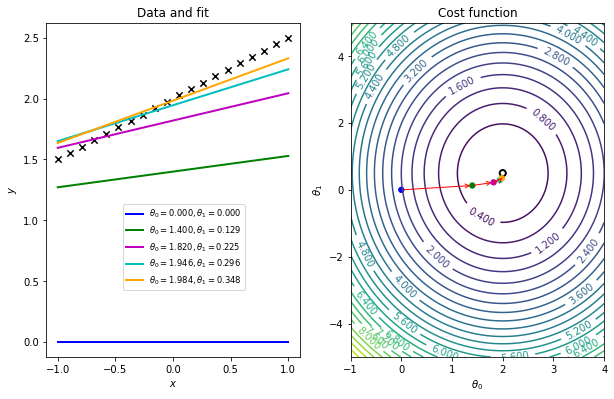

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the Dataset.
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x 

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

## References <a name="references"></a>
- [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.)
- [Optimizing Gradient Descent](https://ruder.io/optimizing-gradient-descent/)
- [Why SGD works?](https://towardsdatascience.com/https-towardsdatascience-com-why-stochastic-gradient-descent-works-9af5b9de09b8)
- [Mini batch SGD](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)
- [GD variants](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3)
- [Optimization Story](https://mlstory.org/optimization.html)
- [Painless Conjugate Gradient](http://www.cs.cmu.edu/~./quake-papers/painless-conjugate-gradient.pdf)
- [Numerical Optimization](https://www.benfrederickson.com/numerical-optimization/index.html)
- [How to choose an optimal learning rate for GD](https://automaticaddison.com/how-to-choose-an-optimal-learning-rate-for-gradient-descent/)
- [Visualizing Gradient Descent method](https://scipython.com/blog/visualizing-the-gradient-descent-method/)
- [Why Momentum Really Works?](https://distill.pub/2017/momentum/)